# Text2Cypher Graph Agent Demo

In [1]:
import sys
sys.path.append("../")

from dotenv import load_dotenv

load_dotenv()

from src.ps_genai_agents.agents.graph.text2cypher import create_text2cypher_graph_agent

In [2]:
agent = create_text2cypher_graph_agent()

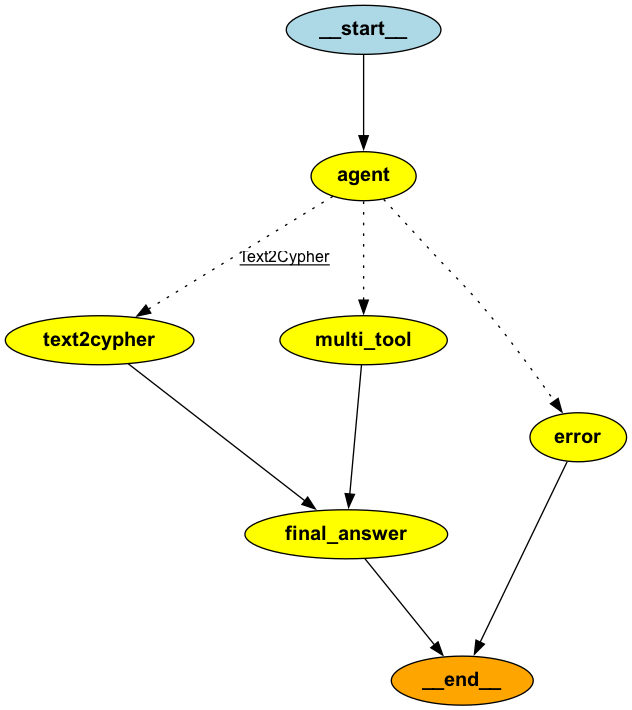

In [3]:
from IPython.display import Image

Image(agent.get_graph().draw_png())

In [4]:
res = agent.invoke(
    {
        "input": "What are the total responses under seat23 for honda civic, what is the male to female proportion for these responses and what is the problem for seat23?",
        "chat_history": [],
    }
)

> run_agent
initial data:  {'input': 'What are the total responses under seat23 for honda civic, what is the male to female proportion for these responses and what is the problem for seat23?', 'sub_questions': None, 'chat_history': [], 'agent_outcome': None, 'intermediate_steps': [], 'cypher': None, 'cypher_result': None}
tool='Text2Cypher' tool_input={'query': 'Get total responses for seat23 in Honda Civic'} log="\nInvoking: `Text2Cypher` with `{'query': 'Get total responses for seat23 in Honda Civic'}`\n\n\n" message_log=[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_mrMJXi2N405HTSu7ipDqu4rx', 'function': {'arguments': '{"query": "Get total responses for seat23 in Honda Civic"}', 'name': 'Text2Cypher'}, 'type': 'function'}, {'id': 'call_V03gox0wmKOW0SqasaMXSalq', 'function': {'arguments': '{"query": "Get male to female proportion for responses under seat23 in Honda Civic"}', 'name': 'Text2Cypher'}, 'type': 'function'}, {'id': 'call_rOqZWtmnoQNet1eLRurvJgdp', 'f

RetrieverInitializationError: Initialization failed: [{'type': 'string_type', 'loc': ('custom_prompt',), 'msg': 'Input should be a valid string', 'input': FewShotPromptTemplate(input_variables=['question'], examples=[{'human': 'What is the proportion of male to female complainants about cup holders in the Honda Odyssey?', 'assistant': 'MATCH (v:Verbatim {{make: "Honda", model: "Odyssey"}})\n  WHERE v.verbatimText CONTAINS "cup holder"\nWITH SUM(COUNT {{MATCH (v:Verbatim) WHERE v.gender = "Male" RETURN v}}) AS males, \n     SUM(COUNT {{MATCH (v:Verbatim) WHERE v.gender = "Female" RETURN v}}) AS females\nRETURN males, females, toFloat(males) / (CASE WHEN females = 0 THEN 1 ELSE females END)  AS maleToFemale'}, {'human': 'What is the proportion of male to female complainants per categories in the Acura RDX?', 'assistant': 'MATCH (c:Category)<-[:HAS_CATEGORY]-(v:Verbatim {{make: "Acura", model: "RDX"}})\nWITH c.id AS category,\n     SUM(COUNT {{MATCH (v:Verbatim) WHERE v.gender = "Male" RETURN v}}) AS males, \n     SUM(COUNT {{MATCH (v:Verbatim) WHERE v.gender = "Female" RETURN v}}) AS females\nRETURN category, males, females, toFloat(males) / (CASE WHEN females = 0 THEN 1 ELSE females END) AS maleToFemale \nORDER BY category'}, {'human': 'Summarize the top 3 most common complaints about Apple CarPlay on the Honda Pilot.', 'assistant': 'MATCH (v:Verbatim {{make: "Honda", model: "Pilot"}})\n  WHERE v.verbatimText CONTAINS "carplay"\nRETURN v.verbatim as content'}, {'human': 'What are the top 10 problems with males between the ages of 40 and 70 years old and what vehicles were involved?', 'assistant': 'MATCH (p:Problem)<-[:HAS_PROBLEM]-(v:Verbatim)\n  WHERE v.minAge >= 40 AND v.maxAge <= 70 AND v.gender = "Male"\nWITH p, COUNT(v) AS total, COLLECT(DISTINCT v.make + " " + v.model) AS vehicles\nORDER BY total DESC\nLIMIT 5\nRETURN p.problem AS problem, total, vehicles'}, {'human': 'What are the top 10 problems that share the most responses between a Honda Odyssey and Honda Civic?', 'assistant': 'MATCH (p:Problem)<-[:HAS_PROBLEM]-(v:Verbatim {{make: "Honda", model: "Odyssey"}})\nWITH p, count(v) AS total1\nMATCH (p)<-[:HAS_PROBLEM]-(v:Verbatim {{make: "Honda", model: "Civic"}})\nWITH p.problem AS problem, total1, count(v) AS total2\nRETURN problem, total1 + total2 AS totalResponses\nORDER BY totalResponses DESC \nLIMIT 10'}, {'human': 'What are the total responses under seat23 for honda civic, what is the male to female proportion for these responses and what is the problem for seat23?', 'assistant': 'MATCH (p:Problem {{id: "SEAT23"}})<-[:HAS_PROBLEM]-(v:Verbatim {{make: "Honda", model: "Civic"}})\nWITH p.problem AS problem, COUNT(v) AS totalResponses, \nSUM(CASE WHEN v.gender = "Male" THEN 1 ELSE 0 END) AS males,\nSUM(CASE WHEN v.gender = "Female" THEN 1 ELSE 0 END) AS females\nRETURN totalResponses, males, females, toFloat(males) /  (CASE WHEN females = 0 THEN 1 ELSE females END) AS maleToFemaleRatio, problem'}, {'human': 'Compare the sentiment for verbatims related to parking cameras in Acura MDX and Acura RDX.', 'assistant': "MATCH (v:Verbatim) \n  WHERE v.verbatimText CONTAINS 'acura mdx' AND v.verbatimText CONTAINS 'parking cameras'\nRETURN v.model AS model, v.verbatim as content LIMIT 50\nUNION\nMATCH (v:Verbatim) \n  WHERE v.verbatimText CONTAINS 'acura rdx' AND v.verbatimText CONTAINS 'parking cameras'\nRETURN v.model AS model, v.verbatim as content LIMIT 50"}, {'human': 'What are the sentiments towards Honda doors?', 'assistant': "MATCH (v:Verbatim) \n  WHERE v.verbatimText CONTAINS 'honda' AND v.verbatimText CONTAINS 'door'\nRETURN v.model AS model, v.verbatim as content"}, {'human': 'For customers who complained about problem DRE10, what other problems are indicated from the same customers? What are top 2 common problems between customers?', 'assistant': "MATCH (p:Problem {{id: 'DRE10'}})<-[:HAS_PROBLEM]-(v:Verbatim)<-[:SUBMITTED]-(c:Customer)\n  WHERE v.verbatim <> ''\nWITH c, p\nMATCH (c)-[:SUBMITTED]->(v2:Verbatim)-[:HAS_PROBLEM]->(p2:Problem)\n  WHERE p <> p2 AND v2.verbatim <> ''\nWITH p.problem AS problem, p2.problem AS similarProblem, COLLECT(v2.verbatim) AS content\nRETURN problem, similarProblem, content, SIZE(content) AS sharedTotal\nORDER BY sharedTotal DESC LIMIT 2;"}, {'human': 'For the infotainment category, what are top 3 models with the highest severity score?', 'assistant': "MATCH (v:Verbatim)\n  WHERE v.verbatimText CONTAINS 'infotainment' AND v.severity IS NOT NULL\nRETURN DISTINCT v.model AS model, count(v) AS totalResponses, avg(v.severity) AS score \nORDER BY score DESC \nLIMIT 10;"}, {'human': 'What are the top 3 infotainment problems for each age buckets?', 'assistant': "MATCH (v:Verbatim)-[:HAS_PROBLEM]->(p:Problem)\n  WHERE v.verbatimText CONTAINS 'infotainment' AND v.ageBucket IS NOT NULL\nWITH v.ageBucket AS ageBucket, p.problem AS problem, collect(v.verbatim) AS responses\nWITH ageBucket, problem, size(responses) AS total, responses\nWITH * ORDER BY ageBucket, total DESC\nWITH ageBucket, COLLECT(problem) AS problems, COLLECT(total) AS totals, COLLECT(responses) AS responsesList\nRETURN ageBucket, problems[..3] AS problem, totals[..3] AS total, responsesList[..3] AS reponses\nLIMIT 3"}, {'human': 'What are the 3 most reported problems for Honda vehicles by model year and what are the 3 most reported problems for Acura vehicles by model year?', 'assistant': "MATCH (v:Verbatim{{make: 'Honda'}})-[:HAS_PROBLEM]->(p:Problem)\nWITH v.make AS make, p.problem AS problem, COUNT(v) AS total ORDER BY total DESC LIMIT 3\nRETURN make, problem, total\nUNION\nMATCH (v:Verbatim{{make: 'Acura'}})-[:HAS_PROBLEM]->(p:Problem)\nWITH v.make AS make, p.problem AS problem, COUNT(v) AS total ORDER BY total DESC LIMIT 3\nRETURN make, problem, total;"}, {'human': 'What are the top 5 most severe questions for females aged 30-34 for all Acura models?', 'assistant': 'MATCH (q:Question)<-[:HAS_QUESTION]-(v:Verbatim) \nWHERE v.gender = "Female" AND v.make = "Acura" AND v.minAge >= 30 AND v.maxAge <= 34 AND v.severity IS NOT NULL\nWITH q, avg(v.severity) as avgSeverity\nRETURN q.question AS question, avgSeverity\nORDER BY avgSeverity DESC\nLIMIT 5'}, {'human': 'What are the top 5 most severe problems for females aged 30-34 for all Acura models?', 'assistant': 'MATCH (p:Problem)<-[:HAS_PROBLEM]-(v:Verbatim) \nWHERE v.gender = "Female" AND v.make = "Acura" AND v.minAge >= 30 AND v.maxAge <= 34 AND v.severity IS NOT NULL\nWITH p, avg(v.severity) as avgSeverity\nRETURN p.problem AS problem, avgSeverity\nORDER BY avgSeverity DESC\nLIMIT 5'}, {'human': 'How similar or different are the verbatims for males and females aged 30-34 for all Acura models?', 'assistant': 'MATCH (v:Verbatim) \nWHERE v.gender = "Male" AND v.make = "Acura" AND v.minAge >= 30 AND v.maxAge <= 34 AND isEmpty(v.verbatim) = false\nWITH collect(v.verbatim) as content\nRETURN "Male" as gender, content LIMIT 50\nUNION\nMATCH (v:Verbatim) \nWHERE v.gender = "Female" AND v.make = "Acura" AND v.minAge >= 30 AND v.maxAge <= 34 AND isEmpty(v.verbatim) = false\nWITH collect(v.verbatim) as content\nRETURN "Female" as gender, content LIMIT 50'}, {'human': 'Please summarize the verbatims for 2023 RDX for question 010 Trunk/TG Touch-Free Sensor DTU and create 5 categories for the problems. As an output, I want a list of verbatims and the corresponding categories', 'assistant': "MATCH (q:Question{{id: 10}})<-[:HAS_QUESTION]-(v:Verbatim)\n  WHERE v.model='RDX'\nRETURN v.verbatim"}], example_prompt=PromptTemplate(input_variables=['assistant', 'human'], template='Human: {human}\nAssistant: {assistant}'), suffix='</samples>\n\n    Human: {question}\n    Assistant:\n    ', prefix="You are an expert Neo4j Cypher translator who understands the question in english and convert to Cypher strictly based on the Neo4j Schema provided and following the instructions below:\n    <instructions>\n    * Use aliases to refer the node or relationship in the generated Cypher query\n    * Generate Cypher query compatible ONLY for Neo4j Version 5\n    * Do not use EXISTS in the cypher. Use alias when using the WITH keyword\n    * Only use SIZE when checking the size of a list\n    * Use only Nodes and relationships mentioned in the schema\n    * Always enclose the Cypher output inside 3 backticks (```)\n    * Always do a case-insensitive and fuzzy search for any properties related search. Eg: to search for a Company name use `toLower(c.name) contains 'neo4j'`\n    * Cypher is NOT SQL. So, do not mix and match the syntaxes\n    * Ensure that null results are filtered out before running aggregations!\n    </instructions>\n\n    Strictly use this Schema for Cypher generation:\n    <schema>\n    \n    </schema>\n\n    The samples below follow the instructions and the schema mentioned above. So, please follow the same when you generate the cypher:\n    <samples>"), 'url': 'https://errors.pydantic.dev/2.7/v/string_type'}]